## 📑 `Samples of outpainted vehicles from different classes`

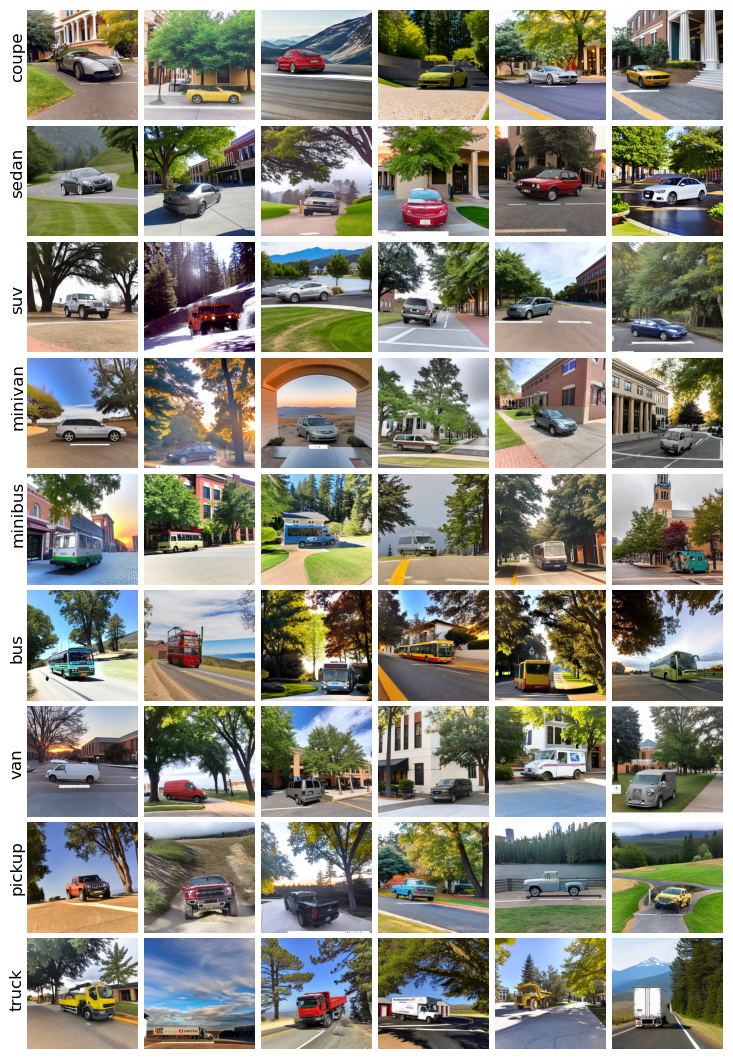

In [1]:
!find $PWD -type d -name ".ipynb_checkpoints" -exec rm -rf {} +
'''
!rm -r $PWD/figs/fig3/outpainted

!rm -r $PWD/figs/fig3/seed
!rm -r $PWD/figs/fig3/real
!rm -r $PWD/figs/fig3/seed_unsplit
!rm -r $PWD/figs/fig3/real_unsplit
'''

import os
import shutil
from src import detect, outpaint, utils
import matplotlib.pyplot as plt

import yaml
with open('config/aidovecl-config.yaml', 'r') as file:
    config = yaml.safe_load(file)

base_path = "./figs/fig3"

def setup_directories():
    for key in ["seed_unsplit", "seed", "real_unsplit", "real", "outpainted"]:
        path = os.path.join(base_path, key)
        if os.path.exists(path):
            shutil.rmtree(path)
        os.makedirs(path)

def generate_seed_images(real_raw_folder_name):
    real_path = os.path.join(base_path, real_raw_folder_name)
    seed_path = os.path.join(base_path, "seed_unsplit")
    for vehicle_type in os.listdir(real_path):
        input_folder = os.path.join(real_path, vehicle_type)
        output_folder = os.path.join(seed_path, vehicle_type)
        print(vehicle_type)
        detect.process_folder(input_folder, output_folder, config, retain_uncropped = True)

def split_dataset(folder_name, seed):
    folder_path = os.path.join(base_path, folder_name)
    folder_split_path = os.path.join(base_path, '_'.join(folder_name.split('_')[:-1]))
    splitter = utils.DatasetSplitter(folder_path, folder_split_path, split_ratios={'train': 1, 'val': 0, 'test': 0}, seed=seed)
    splitter.execute()
    shutil.rmtree(folder_path)

def perform_outpainting():
    seed_split_path = os.path.join(base_path, "seed")
    outpainted_path = os.path.join(base_path, "outpainted")
    outpaint.generate_outpainted(seed_split_path, outpainted_path, config=config, random_seed=0)

def plot_outpainted_images():
    plt.rcdefaults()
    image_loader = utils.ImageLoader(os.path.join(base_path, "outpainted", 'train', 'images'),config=config)
    images = image_loader.load_images_from_folder()
    image_loader.plot_images(images)


#setup_directories()
#generate_seed_images("real_raw")
#split_dataset("real_unsplit", 0)
#split_dataset("seed_unsplit", 0)
#perform_outpainting()
plot_outpainted_images()